# 문서 전처리

모든 데이터 분석 모형은 숫자로 구성된 고정 차원 벡터를 독립 변수로 하고 있으므로 문서(document)를 분석을 하는 경우에도 숫자로 구성된 특징 벡터(feature vector)를 문서로부터 추출하는 과정이 필요하다. 이러한 과정을 문서 전처리(document preprocessing)라고 한다.

## BOW (Bag of Words)

문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW (Bag of Words) 이다. BOW 방법에서는 전체 문서 $\{D_1, D_2, \ldots, D_n\}$ 들를 구성하는 고정된 단어장(vocabulary) $\{W_1, W_2, \ldots, W_m\}$ 를  만들고 $D_i$라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

$$ \text{ if word $W_j$ in document $D_i$ }, \;\; \rightarrow x_{ij} = 1 $$ 

## Scikit-Learn 의 문서 전처리 기능

Scikit-Learn 의 feature_extraction.text 서브 패키지는 다음과 같은 문서 전처리용 클래스를 제공한다.

* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): 
 * 문서 집합으로부터 단어의 수를 세어 카운트 행렬을 만든다.
* [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): 
 * 문서 집합으로부터 단어의 수를 세고 TF-IDF 방식으로 단어의 가중치를 조정한 카운트 행렬을 만든다.
* [`HashingVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html): 
 * hashing trick 을 사용하여 빠르게 카운트 행렬을 만든다.
 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{u'and': 0,
 u'document': 1,
 u'first': 2,
 u'is': 3,
 u'last': 4,
 u'one': 5,
 u'second': 6,
 u'the': 7,
 u'third': 8,
 u'this': 9}

In [3]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [4]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [5]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

## 문서 처리 옵션

`CountVectorizer`는 다양한 인수를 가진다. 그 중 중요한 것들은 다음과 같다.

* `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
 * stop words 목록.‘english’이면 영어용 스탑 워드 사용.
* `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
 * 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램 
* `tokenizer` : 함수 또는 None (디폴트)
 * 토큰 생성 함수 .
* `token_pattern` : string
 * 토큰 정의용 정규 표현식 
* `ngram_range` : (min_n, max_n) 튜플
 * n-그램 범위 
* `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
 * 단어장에 포함되기 위한 최대 빈도
* `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수.  디폴트 1
 * 단어장에 포함되기 위한 최소 빈도 
* `vocabulary` : 사전이나 리스트
 * 단어장

## Stop Words

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. `stop_words` 인수로 조절할 수 있다.

In [6]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{u'document': 0, u'first': 1, u'last': 2, u'one': 3, u'second': 4, u'third': 5}

In [7]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{u'document': 0, u'second': 1}

## 토큰(token)

토큰은 문서에서 단어장을 생성할 때 하나의 단어가 되는 단위를 말한다. `analyzer`, `tokenizer`, `token_pattern` 등의 인수로 조절할 수 있다.

In [8]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{u' ': 0,
 u'.': 1,
 u'?': 2,
 u'a': 3,
 u'c': 4,
 u'd': 5,
 u'e': 6,
 u'f': 7,
 u'h': 8,
 u'i': 9,
 u'l': 10,
 u'm': 11,
 u'n': 12,
 u'o': 13,
 u'r': 14,
 u's': 15,
 u't': 16,
 u'u': 17}

In [9]:
import nltk
nltk.download("punkt")
vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to /home/joel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{u'.': 0,
 u'?': 1,
 u'and': 2,
 u'document': 3,
 u'first': 4,
 u'is': 5,
 u'last': 6,
 u'one': 7,
 u'second': 8,
 u'the': 9,
 u'third': 10,
 u'this': 11}

In [10]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{u'the': 0, u'third': 1, u'this': 2}

## n-그램

n-그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 1-그램은 토큰 하나만 단어로 사용하며 2-그램은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [11]:
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_

{u'and the': 0,
 u'first document': 1,
 u'is the': 2,
 u'is this': 3,
 u'last document': 4,
 u'second document': 5,
 u'second second': 6,
 u'the first': 7,
 u'the last': 8,
 u'the second': 9,
 u'the third': 10,
 u'third one': 11,
 u'this is': 12,
 u'this the': 13}

In [12]:
vect = CountVectorizer(ngram_range=(1,2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{u'the': 0, u'the third': 1, u'third': 2, u'this': 3, u'this the': 4}

## 빈도수

`max_df`, `min_df` 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 `max_df`로 지정한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다. 

In [13]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({u'document': 0, u'first': 1, u'is': 2, u'this': 3},
 {u'and', u'last', u'one', u'second', u'the', u'third'})

In [14]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

## TF-IDF

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(d, t) $$


여기에서

* $\text{tf}(d, t)$: 단어의 빈도수
* $\text{idf}(d, t)$ : inverse document frequency 
 
 $$ \text{idf}(d, t) = \log \dfrac{n_d}{1 + \text{df}(t)} $$
 
* $n_d$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.24151532,  0.        ,  0.28709733,  0.        ,
         0.        ,  0.85737594,  0.20427211,  0.        ,  0.28709733],
       [ 0.55666851,  0.        ,  0.        ,  0.        ,  0.        ,
         0.55666851,  0.        ,  0.26525553,  0.55666851,  0.        ],
       [ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.45333103,  0.        ,  0.        ,  0.80465933,
         0.        ,  0.        ,  0.38342448,  0.        ,  0.        ]])

## Hashing Trick

`CountVectorizer`는 모든 작업을 in-memory 상에서 수행하므로 데이터 양이 커지면 속도가 느려지거나 실행이 불가능해진다. 이 때 
`HashingVectorizer`를 사용하면 Hashing Trick을 사용하여 메모리 및 실행 시간을 줄일 수 있다.

In [17]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [18]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 8.93 s, sys: 70.4 ms, total: 9 s
Wall time: 8.91 s


<11314x130107 sparse matrix of type '<type 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)

In [20]:
%time hv.transform(twenty.data)

CPU times: user 6.05 s, sys: 18.5 ms, total: 6.07 s
Wall time: 6.03 s


<11314x10 sparse matrix of type '<type 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

## 형태소 분석기 이용

In [21]:
corpus = ["imaging", "image", "imagination", "imagine", "buys", "buying", "bought"]
vect = CountVectorizer().fit(corpus)
vect.vocabulary_

{u'bought': 0,
 u'buying': 1,
 u'buys': 2,
 u'image': 3,
 u'imagination': 4,
 u'imagine': 5,
 u'imaging': 6}

In [22]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
docs = twenty.data[:100]

In [23]:
vect = CountVectorizer(stop_words="english", token_pattern="wri\w+").fit(docs)
vect.vocabulary_

{u'write': 0,
 u'writer': 1,
 u'writers': 2,
 u'writes': 3,
 u'writing': 4,
 u'writing_': 5,
 u'written': 6}

In [27]:
from nltk.stem import SnowballStemmer

class StemTokenizer(object):
    def __init__(self):
        self.s = SnowballStemmer('english')
        self.t = CountVectorizer(stop_words="english", token_pattern="wri\w+").build_tokenizer()
    def __call__(self, doc):
        return [self.s.stem(t) for t in self.t(doc)]

vect = CountVectorizer(tokenizer=StemTokenizer()).fit(docs)
vect.vocabulary_

{u'write': 0, u'writer': 1, u'writing_': 2, u'written': 3}

## 예

In [31]:
import urllib2
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

req = urllib2.Request("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
opener = urllib2.build_opener()
f = opener.open(req)
json = json.loads(f.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == u"markdown"]
docs = [w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

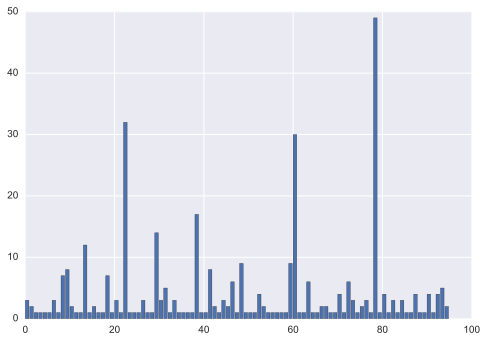

In [37]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
plt.bar(range(len(count)), count)
plt.show()

In [38]:
pprint(zip(vect.get_feature_names(), count))

[(377ad03459bf, 3),
 (a181562ac4d8, 2),
 (a1e4ed2ac65b, 1),
 (container, 1),
 (daemon, 1),
 (docker, 1),
 (dockeruser, 3),
 (image, 1),
 (mingw64, 7),
 (가동, 8),
 (가상, 2),
 (가지, 1),
 (개념, 1),
 (경우, 12),
 (공유, 1),
 (관련하, 2),
 (나오기, 1),
 (내부, 1),
 (다음, 7),
 (대표적, 1),
 (대화형, 3),
 (데몬, 1),
 (도커, 32),
 (때문, 1),
 (리눅스, 1),
 (마지막, 1),
 (마찬가지, 3),
 (머신, 1),
 (메모리, 1),
 (명령, 14),
 (명령어, 3),
 (목록, 5),
 (문자, 1),
 (문자열, 3),
 (버튼, 1),
 (복사, 1),
 (복수, 1),
 (복수개의, 1),
 (사용, 17),
 (사용자, 1),
 (사용해, 1),
 (삭제, 8),
 (생각, 2),
 (생성, 1),
 (수행, 3),
 (시스템, 2),
 (시작, 6),
 (아래, 1),
 (아이디, 9),
 (여기, 1),
 (연결, 1),
 (오류, 1),
 (옵션, 4),
 (외부, 2),
 (원본, 1),
 (윈도우즈, 1),
 (으로, 1),
 (의미, 1),
 (의존, 1),
 (이름, 9),
 (이미지, 30),
 (이해, 1),
 (일부분, 1),
 (입력, 6),
 (자동, 1),
 (자체, 1),
 (작업, 2),
 (저장, 2),
 (정지, 1),
 (조합, 1),
 (존재, 4),
 (중복, 1),
 (중지, 6),
 (지정, 3),
 (첫번, 1),
 (추가, 2),
 (출력, 3),
 (컨테이, 1),
 (컨테이너, 49),
 (컨테이너상, 1),
 (컴퓨터, 4),
 (콜론, 1),
 (터미널, 3),
 (툴박스, 1),
 (특정, 3),
 (파일, 1),
 (포워딩, 1),
 (포트, 4),
 (폴더, 1),
 (표시, 1),
 (